#3. SUPPLIERS

In [1]:
##Importing the Libraries that are going to be used.

In [2]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

#Execute all the "Jupyter notebook Non prints"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last' #'last' / 'last'

In [3]:
#Load the data
rated_bookings_file = './Datasets/rated_bookings_with_location.csv'
rb=pd.read_csv(rated_bookings_file)

#Convert to Datetimes
rb['pickup_date'] = pd.to_datetime(rb['pickup_date'])
rb['last_update_date'] = pd.to_datetime(rb['last_update_date'])
rb['booking_date'] = pd.to_datetime(rb['booking_date'])
rb['rating_date'] = pd.to_datetime(rb['rating_date'])

#Load the bookings
bookings_file = './Datasets/all_bookings3.0.csv'
book=pd.read_csv(bookings_file)

book['pickup_date'] = pd.to_datetime(book['pickup_date'])
book['last_update_date'] = pd.to_datetime(book['last_update_date'])
book['booking_date'] = pd.to_datetime(book['booking_date'])



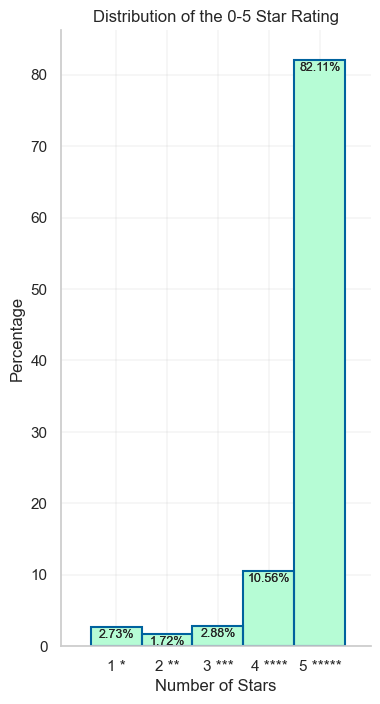

In [162]:
#Taking a general view about our reviews

width = 4
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')


ax=sns.histplot(rb, x='rating_score', stat='percent', discrete=True, alpha=1, color='#b6fcd5')
ax=sns.histplot(rb, x='rating_score', stat='percent', discrete=True, alpha=1, fill=False, color='#00629e')
ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f%%',fontsize=9, padding=-10)
ax.set_xticks([1,2,3,4,5], labels=['1 *','2 **','3 ***','4 ****','5 *****'])

plt.title('Distribution of the 0-5 Star Rating')

#ax.set_xticks(range(len(df)), labels=range(2011, 2019))
ax.set(xlabel='Number of Stars', ylabel='Percentage')
plt.setp(ax.patches, linewidth=1.5 )

ax.set_ylim(ymin=0.)
ax.set_xlim(xmin=-0.08,xmax=6)
sns.despine(top=True)


plt.show()

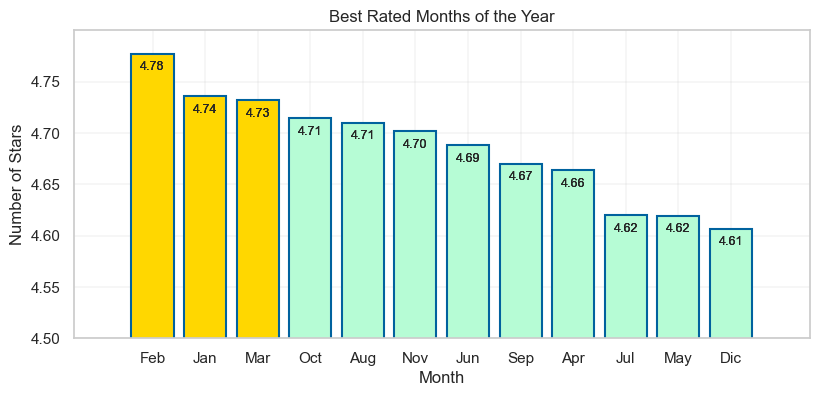

In [5]:
#Best Rated months 

#DATA
group = rb.groupby(rb['pickup_date'].dt.month)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['mean'], ascending=False)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
#g1

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)

ax.set_xticks(g1['pickup_date']-1, labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic'])#<-- This is improveable :( but for some reason it is not working intuitively.
ax.set_ylim(ymin=4.5 ,ymax=4.80)
ax.set(yticks=np.arange(4.5, 4.8, .05))
ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('Best Rated Months of the Year')

ax.set(xlabel='Month', ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


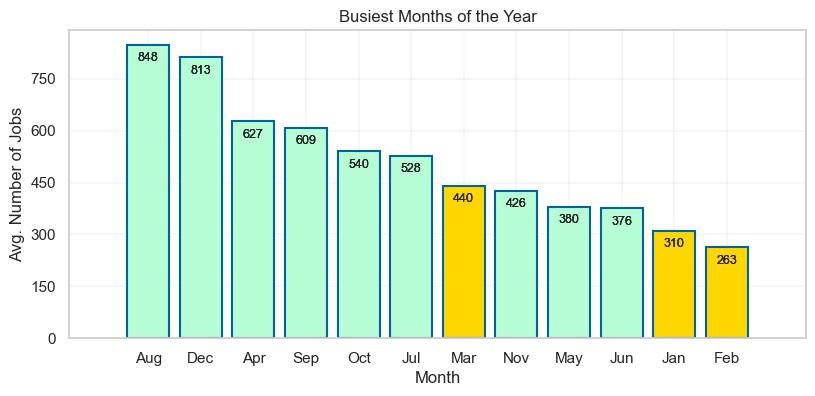

In [6]:
#What about the volume of work? What is the busiest month?

#DATA
group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month])
g1=group.agg({'booking_id':['count']})
g1.index.rename(['year','month'], inplace=True) #Gold Nugget!!
g1.columns=['count']
g1.reset_index(inplace=True)
g1=g1.groupby('month')
g2=g1.agg({'count':['mean']})
g2.columns=['mean']
g2.sort_values(by='mean', ascending=False, inplace=True)
g2.reset_index(inplace=True)


#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#FFD700','#FFD700']

ax=sns.barplot(data=g2, x='month',y='mean',  fill=True, order=g2['month'])
ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g2['mean'],color=filledcolors)
ax=sns.barplot(data=g2, x='month',y='mean',  fill=False, order=g2['month'], color='#00629e')

#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)

months=['Aug','Dec','Apr','Sep','Oct','Jul','Mar','Nov','May','Jun','Jan','Feb'] #<-- This is improvable :( but for some reason it is not working intuitively.
ax.set_xticks(range(0,12), labels=months)
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
ax.set(yticks=np.arange(0, 850, 150))
ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('Busiest Months of the Year')

ax.set(xlabel='Month', ylabel='Avg. Number of Jobs')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()
#g2

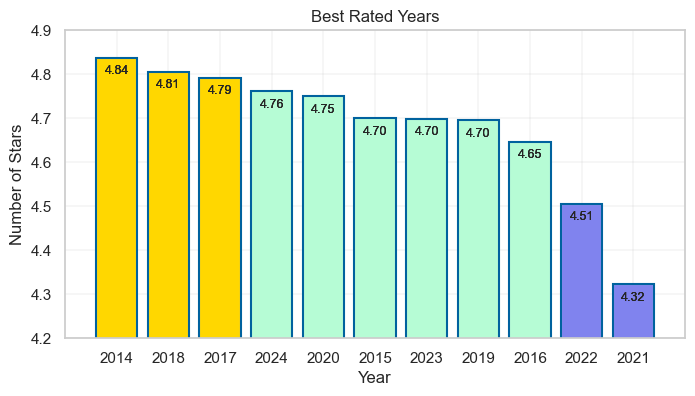

In [7]:
#Ranking of best Rated Year

#DATA
group = rb.groupby(rb['pickup_date'].dt.year)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['mean'], ascending=False)
g1

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#8083ee','#8083ee']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6,7,8,9,10],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)

ax.set_ylim(ymin=4.2 ,ymax=4.9)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Best Rated Years')

ax.set(xlabel='Year', ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


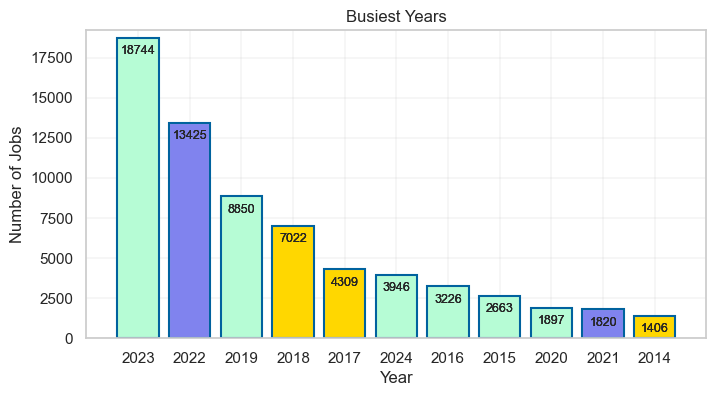

In [8]:
#Busiest Years

#DATA
group = book[book['pickup_date'].dt.year<2025].groupby(book['pickup_date'].dt.year)
g1=group.agg({'booking_id':['count']})
g1.columns=['count']
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#8083ee','#b6fcd5','#FFD700','#FFD700', '#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#8083ee','#FFD700']
ax=sns.barplot(data=g1, x='pickup_date',y='count',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6,7,8,9,10],g1['count'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='count',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)

ax.set_ylim(ymin=0 ,ymax=19200)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Busiest Years')

ax.set(xlabel='Year', ylabel='Number of Jobs')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


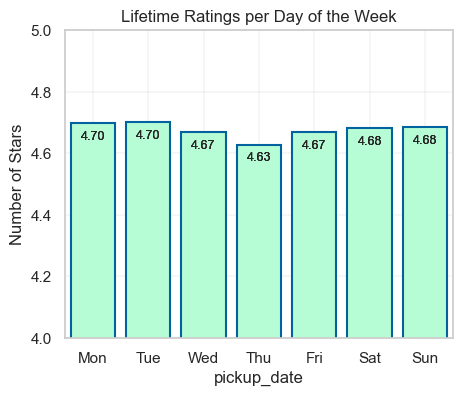

In [21]:
#What about the days? What is the highest rated day of the week?
#Worth checking the volume?
#Ranking of best Rated Year

#DATA
group = rb.groupby(rb['pickup_date'].dt.weekday)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['pickup_date'], ascending=True)
g1

#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
    
ax.set_xticks(g1['pickup_date'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylim(ymin=4 ,ymax=5)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Lifetime Ratings per Day of the Week')

ax.set(ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()



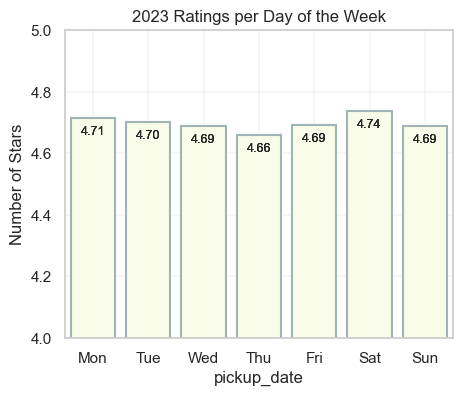

In [26]:
#Filtering for the Steady big years
#What about the days? What is the highest rated day of the week?
#Worth checking the volume?
#Ranking of best Rated Year

#DATA
group = rb[rb['pickup_date'].dt.year.isin([2023])].groupby(rb['pickup_date'].dt.weekday)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['pickup_date'], ascending=True)
g1

#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#f8fce8','#f8fce8','#f8fce8','#f8fce8','#f8fce8','#f8fce8','#f8fce8']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#a0b4b8')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
    
ax.set_xticks(g1['pickup_date'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylim(ymin=4 ,ymax=5)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('2023 Ratings per Day of the Week')

ax.set(ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()



In [11]:
def weekend(num):
    if int(num) <5:
        return 'Workday'
    else:
        return 'Weekend'
    
#DATA
rb_weekend=rb
rb_weekend['weekend']=rb['pickup_date'].apply(lambda x: weekend(x.dayofweek))

group = rb.groupby(rb['weekend'])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1

,weekend,count,mean,sum,min,max,std
0,Weekend,6461,4.682247,30252,1,5,0.832640
1,Workday,13607,4.672962,63585,1,5,0.845333


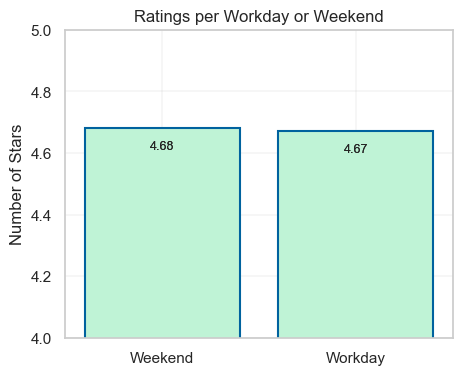

In [12]:
#WorkDay or Weekend?
#Worth checking the volume?
#Ranking of best Rated Year

def weekend(num):
    if int(num) <5:
        return 'Workday'
    else:
        return 'Weekend'
    
#DATA
rb_weekend=rb
rb_weekend['weekend']=rb['pickup_date'].apply(lambda x: weekend(x.dayofweek))

group = rb.groupby(rb['weekend'])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1

#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#b6fcd5']


ax=sns.barplot(data=g1, x='weekend',y='mean',  fill=True, order=g1['weekend'], color='#b6fcd5')
ax=sns.barplot(data=g1, x='weekend',y='mean',  fill=False, order=g1['weekend'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-18, fontsize=9)
    
#ax.set_xticks(g1['weekend'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylim(ymin=4 ,ymax=5)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Ratings per Workday or Weekend')

ax.set(xlabel="", ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


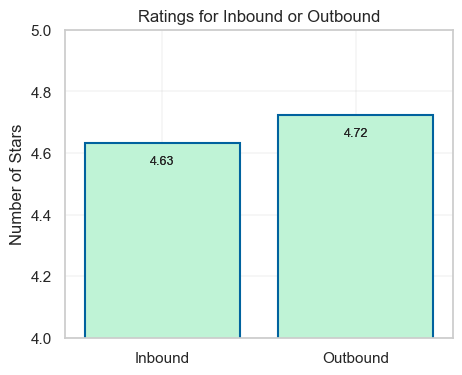

In [13]:
#Inbound or Outbound?
#Worth checking the volume?
#Ranking of best Rated Year

   
#DATA
group = rb.groupby(rb['in_or_outbound'])
g1=group.agg({'rating_score':['mean']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1

#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#b6fcd5']


ax=sns.barplot(data=g1, x='in_or_outbound',y='mean',  fill=True, order=g1['in_or_outbound'], color='#b6fcd5')
ax=sns.barplot(data=g1, x='in_or_outbound',y='mean',  fill=False, order=g1['in_or_outbound'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-18, fontsize=9)
    
#ax.set_xticks(g1['weekend'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylim(ymin=4 ,ymax=5)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Ratings for Inbound or Outbound')

ax.set(xlabel="", ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


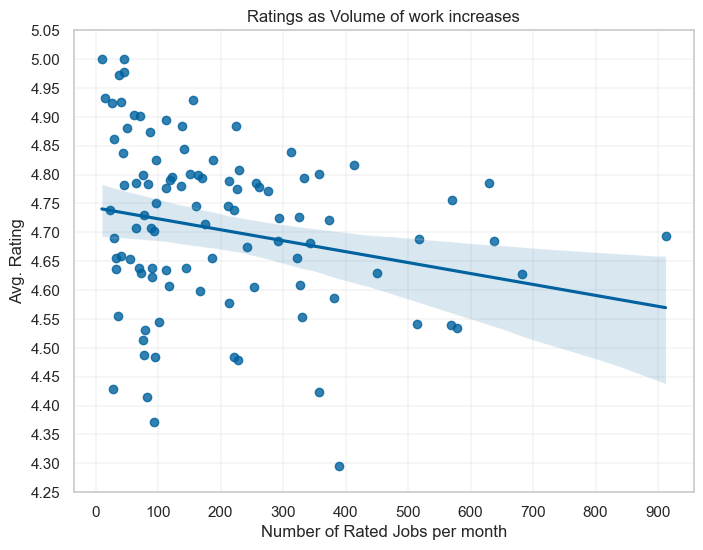

In [35]:
#REGPLOT
#Correlation Volume Year vs Rating
group = rb.groupby(rb['pickup_date'].dt.to_period('M'))
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]

#VISUALIZATION
width = 8
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')


ax=sns.regplot(data=g1,x='count',y='mean', fit_reg=True, color='#00629e')

ax.grid(linewidth=0.25)
    
ax.set_ylim(ymin=4.25 ,ymax=5)

ax.set(yticks=np.arange(4.25, 5.1, .05))
ax.set(xticks=np.arange(0, 1000, 100))


plt.title('Ratings as Volume of work increases')

ax.set(xlabel="Number of Rated Jobs per month", ylabel='Avg. Rating')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


<Axes: xlabel='count', ylabel='mean'>

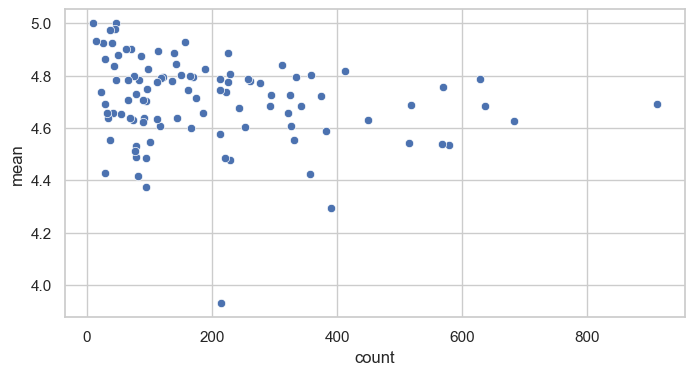

In [15]:
#Correlation Volume month vs Avg Rating in the Ratings Dataset
#No Hue. Keep it as well.
#DATA
group = rb.groupby(rb['pickup_date'].dt.to_period('M'))
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

sns.scatterplot(data=g1, x='count',y='mean')


'\nConclusion\nWhat I see here is that the Average Rating is 4.7 and the bigger the count\nis for a month, the stronger it is agains variations.\nBecause the ratings are discrete and go from 1 to 5. Being the average close to 4.7,\neverything that is not a 5 (closest value) is a big deviation, these deviations happen, \nhowever if it is a bigger work month they migth get compensated better.\nVehicles like Sedan and SUV6 have big volume to prove this.\n'

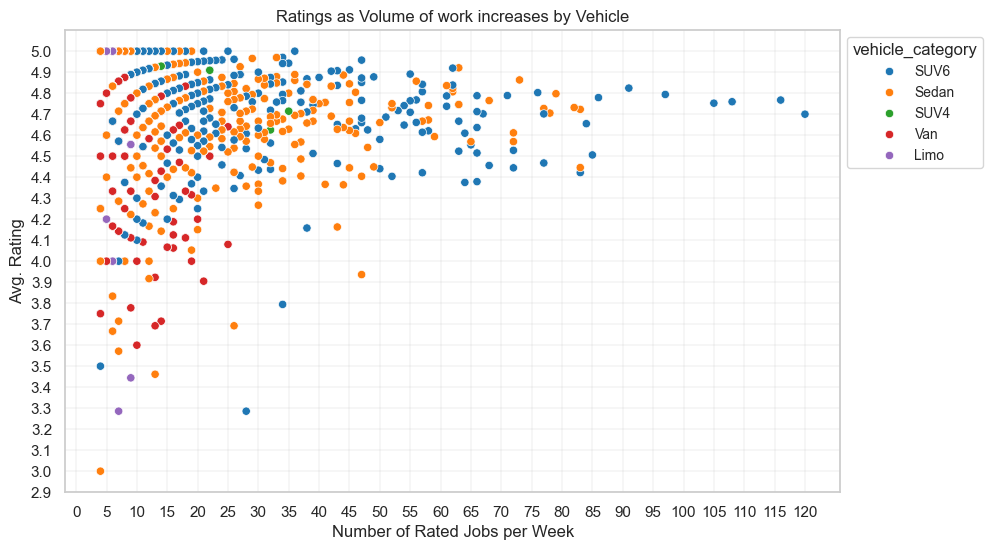

In [78]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb.groupby([rb['pickup_date'].dt.to_period('W'),rb['vehicle_category']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=4]
g1


#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g1, x='count',y='mean', hue='vehicle_category', alpha=1,palette=sns.color_palette("tab10", n_colors=5))
ax.grid(linewidth=0.25)
ax.set_ylim(ymin=4.25 ,ymax=5.1)
ax.set(yticks=np.arange(2.9, 5.1, .1))
ax.set(xticks=np.arange(0, 125, 5))
plt.title('Ratings as Volume of work increases by Vehicle')
ax.set(xlabel="Number of Rated Jobs per Week", ylabel='Avg. Rating')
plt.setp(ax.patches, linewidth=1.5 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)



'''
Conclusion
What I see here is that the Average Rating is 4.7 and the bigger the count
is for a month, the stronger it is agains variations.
Because the ratings are discrete and go from 1 to 5. Being the average close to 4.7,
everything that is not a 5 (closest value) is a big deviation, these deviations happen, 
however if it is a bigger work month they migth get compensated better.
Vehicles like Sedan and SUV6 have big volume to prove this.
'''

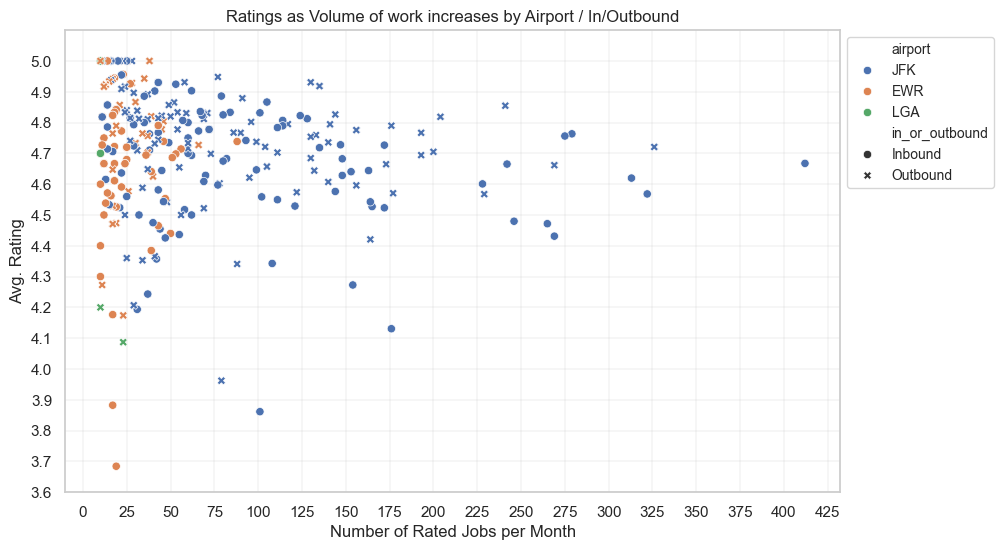

In [88]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb.groupby([rb['pickup_date'].dt.to_period('M'),rb['airport'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')



#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g1, x='count',y='mean', hue='airport', style='in_or_outbound')
ax.grid(linewidth=0.25)
ax.set_ylim(ymin=4.25 ,ymax=5.1)
ax.set(yticks=np.arange(3.6, 5.1, .1))
ax.set(xticks=np.arange(0, 450, 25))
plt.title('Ratings as Volume of work increases by Airport / In/Outbound')
ax.set(xlabel="Number of Rated Jobs per Month", ylabel='Avg. Rating')
plt.setp(ax.patches, linewidth=1.5 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)

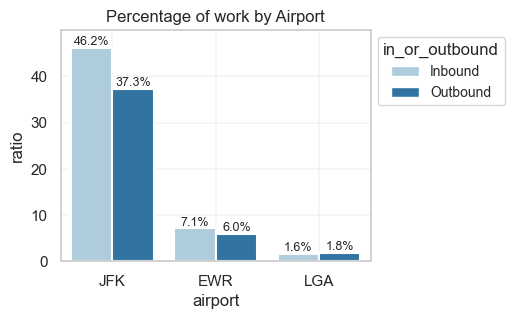

In [194]:
group = book.groupby(['airport','in_or_outbound'])
g1=group.agg({'booking_id':['count']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
#g1=g1[g1['count']>=10]
total=g1['count'].sum()
g1['ratio']=(g1['count']/total)*100
g1

width = 4
height = 3
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.barplot(g1,x='airport', y='ratio', errorbar=None, hue='in_or_outbound', palette='Paired')
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.1f%%', padding=0, fontsize=9)
plt.title('Percentage of work by Airport')

ax.grid(linewidth=0.25)
ax.set_ylim(ymin=0 ,ymax=50)
ax.set(yticks=np.arange(0, 50, 10))
#ax.set(xticks=np.arange(0, 450, 25))

plt.setp(ax.patches, linewidth=1.5 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_1096/1951746524.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(g1,x='vehicle_category', y='ratio', errorbar=None, palette='Dark2')


[None, None, None, None, None]

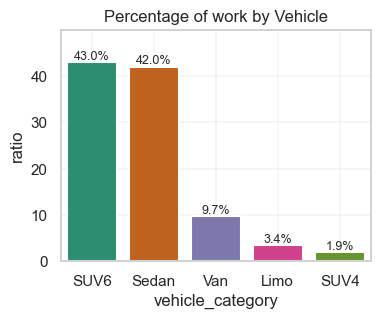

In [204]:
group = book.groupby(['vehicle_category'])
g1=group.agg({'booking_id':['count']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
#g1=g1[g1['count']>=10]
total=g1['count'].sum()
g1['ratio']=(g1['count']/total)*100
g1

width = 4
height = 3
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.barplot(g1,x='vehicle_category', y='ratio', errorbar=None, palette='Dark2')
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.1f%%', padding=0, fontsize=9)
plt.title('Percentage of work by Vehicle')

ax.grid(linewidth=0.25)
ax.set_ylim(ymin=0 ,ymax=50)
ax.set(yticks=np.arange(0, 50, 10))
#ax.set(xticks=np.arange(0, 450, 25))

plt.setp(ax.patches, linewidth=1.5 )
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


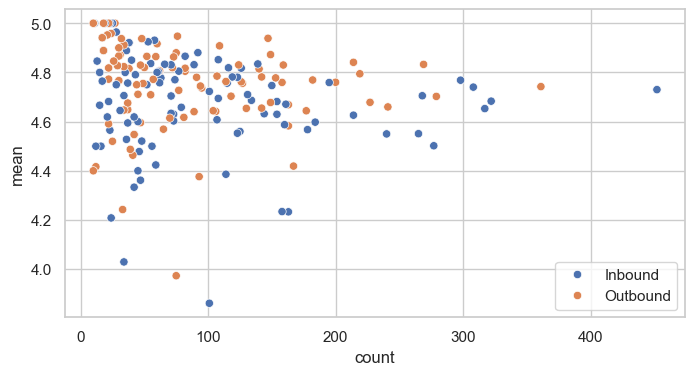

In [18]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb[rb['vehicle_category'].isin(['Sedan','SUV4','SUV6'])].groupby([rb['pickup_date'].dt.to_period('M'),rb['in_or_outbound']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

sns.scatterplot(data=g1, x='count',y='mean', hue='in_or_outbound')
plt.legend(loc='lower right')


/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_1096/4252554845.py:19: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  ax=sns.scatterplot(data=g1, x='count',y='mean', hue='year',palette=sns.color_palette("tab10", n_colors=12),s=85)


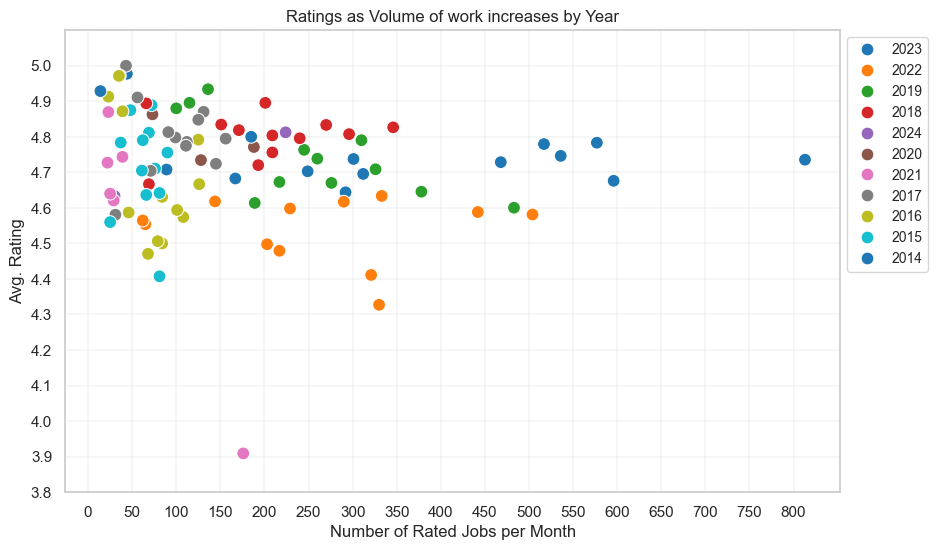

In [90]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb[rb['vehicle_category'].isin(['Sedan','SUV4','SUV6'])].groupby([rb['pickup_date'].dt.to_period('M'),rb['pickup_date'].dt.to_period('Y')])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1.index.rename(['month','year'], inplace=True)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1

#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g1, x='count',y='mean', hue='year',palette=sns.color_palette("tab10", n_colors=12),s=85)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(linewidth=0.25)
ax.set_ylim(ymin=4.25 ,ymax=5.1)
ax.set(yticks=np.arange(3.80, 5.1, .1))
ax.set(xticks=np.arange(0, 850, 50))
plt.title('Ratings as Volume of work increases by Year')
ax.set(xlabel="Number of Rated Jobs per Month", ylabel='Avg. Rating')
plt.setp(ax.patches, linewidth=1.5 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)

#plt.legend(loc='lower right')


/usr/local/lib/python3.11/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


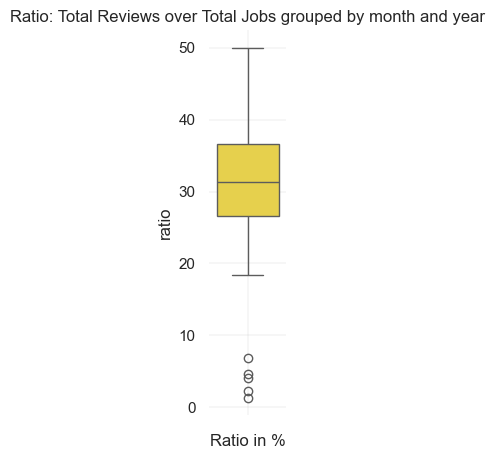

In [156]:
group = rb.groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['year','month'], ascending=True)
#g1

group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month])
g2=group.agg({'booking_id':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2=g2.reset_index()
g2=g2.sort_values(by=['year','month'], ascending=True)
#g2

g3=pd.merge(g1,g2,how='left',left_on=['year','month'],right_on=['year','month'])
g3['ratio']=(g3['count_x']/g3['count_y'])*100
g3=g3.sort_values(by=['year','month'], ascending=True)
g3


#VISUALIZATION
width = 1
height = 5
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=box_plot=sns.boxplot(g3,y='ratio', orient='h', color='#ffe234')
ax.grid(linewidth=0.25)
ax.set(xlabel="Ratio in %")
plt.title('Ratio: Total Reviews over Total Jobs grouped by month and year')
sns.despine(left=True, bottom=True)





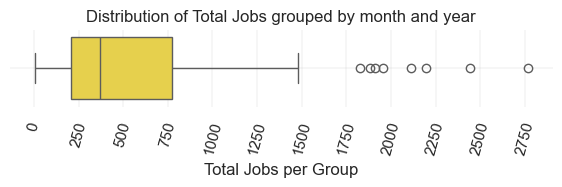

In [157]:
group = rb.groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['year','month'], ascending=True)
#g1

group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month])
g2=group.agg({'booking_id':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2=g2.reset_index()
g2=g2.sort_values(by=['year','month'], ascending=True)
#g2

g3=pd.merge(g1,g2,how='left',left_on=['year','month'],right_on=['year','month'])
g3['ratio']=(g3['count_x']/g3['count_y'])*100
g3=g3.sort_values(by=['year','month'], ascending=True)
g3


#VISUALIZATION
width = 7
height = 1
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=box_plot=sns.boxplot(g3,x='count_y',color='#ffe234')
ax.grid(linewidth=0.25)
ax.set(xlabel="Total Jobs per Group")
plt.title('Distribution of Total Jobs grouped by month and year')
ax.set(xticks=np.arange(0, 3000, 250))
plt.xticks(rotation=75)
sns.despine(left=True, bottom=True)





(array([   0,  250,  500,  750, 1000, 1250, 1500, 1750, 2000, 2250, 2500,
        2750]),
 [Text(0, 0, '0'),
  Text(250, 0, '250'),
  Text(500, 0, '500'),
  Text(750, 0, '750'),
  Text(1000, 0, '1000'),
  Text(1250, 0, '1250'),
  Text(1500, 0, '1500'),
  Text(1750, 0, '1750'),
  Text(2000, 0, '2000'),
  Text(2250, 0, '2250'),
  Text(2500, 0, '2500'),
  Text(2750, 0, '2750')])

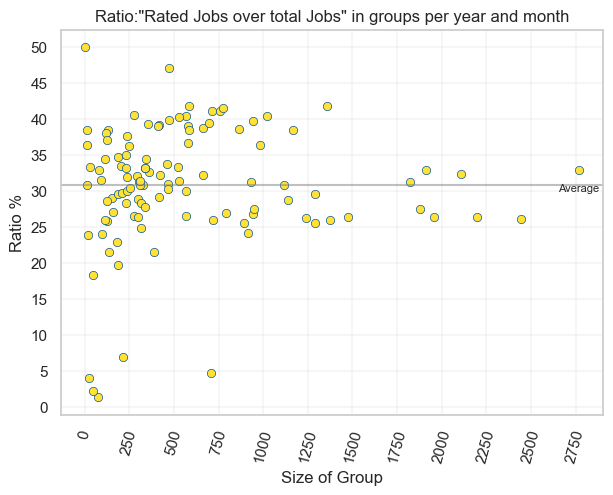

In [154]:
group = rb.groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['year','month'], ascending=True)
#g1

group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month])
g2=group.agg({'booking_id':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2=g2.reset_index()
g2=g2.sort_values(by=['year','month'], ascending=True)
#g2

g3=pd.merge(g1,g2,how='left',left_on=['year','month'],right_on=['year','month'])
g3['ratio']=(g3['count_x']/g3['count_y'])*100
g3=g3.sort_values(by=['year','month'], ascending=True)
g3
avg=g3['ratio'].mean()


#VISUALIZATION
width = 7
height = 5
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='count_y', y='ratio', color='#ffe234', edgecolors='#004f98')
plt.axhline(y=avg, color='grey', alpha=0.5)
ax.text(2650,30, "Average", fontsize=8) 
ax.grid(linewidth=0.25)
ax.set(xlabel="Size of Group")
ax.set(ylabel="Ratio %")
plt.title('Ratio:\"Rated Jobs over total Jobs\" in groups per year and month')
ax.set(xticks=np.arange(0, 3000, 250))
ax.set(yticks=np.arange(0, 51, 5))
plt.xticks(rotation=75)